# Exercise: Central Limit Theorem

In this exercise we will show what is the Central Limit Theorem and how it applies 

### Part 1: Generate random number according to a uniform distriobution

The first goal is to generate *n* random numbers according to a uniform distribution between [-1,1], fill an histogram and compute the average of the generated numbers.
Display also the obtained histogram.

Let's start with n = 10

In [1]:
int n = 10; 
TRandom3 r(0);  // initialize with zero to have a random seed 

Create and book the histogram

In [2]:
auto h1 = new TH1D("h1","Distribution of generated values",100,-1,1);

Generate the numbers and fill the histogram.
You can compute the average directly or let the histogram computing it for you

In [3]:
for (int i = 0; i < n; ++i) {
    double x = r.Uniform(-1,1);
    h1->Fill(x);        
}

Display the histogram and print out the average result

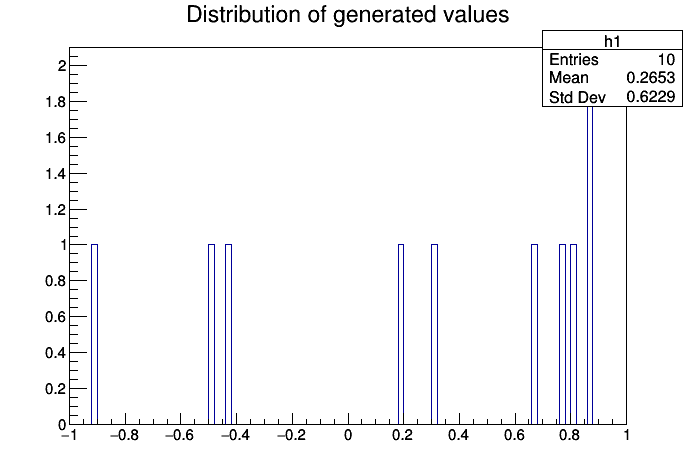

sample mean = 0.265254


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [4]:
h1->Draw();
gPad->Draw();
std::cout << "sample mean = " << h1->GetMean() << std::endl;

### Part 2: Study the distribution of the sample mean composed  of *n* numbers uniformly distributed

Now repeat many times what has been done before to study the distribution of the average, $\mu$. The exercise will show that this distribution will converge very quickly to a Gaussian distribution. It is enough to have a very small 
$n$ to get already a pretty good Gaussian. 
For having the sigma of the distribution indipendent on the number of generated events $n$, we will 
make an histogram of $\sqrt{n}  \times \mu$.

Do then as following: 
*  Make a loop where for each time $n$ uniform numbers are generated and their average $\mu$ is computed. 
*  Make an histogram now of $\sqrt{n}  \times \mu$.

Start using a very small $n$ (e.g. $n=2$) but use for the loop, which performs the generation of $n$ numbers, a large value (e.g. $n_{experiments} = 10000$. 

In [5]:
auto hout = new TH1D("h","Sample Mean Distribution",50,-2,2);
int nexp = 10000;  

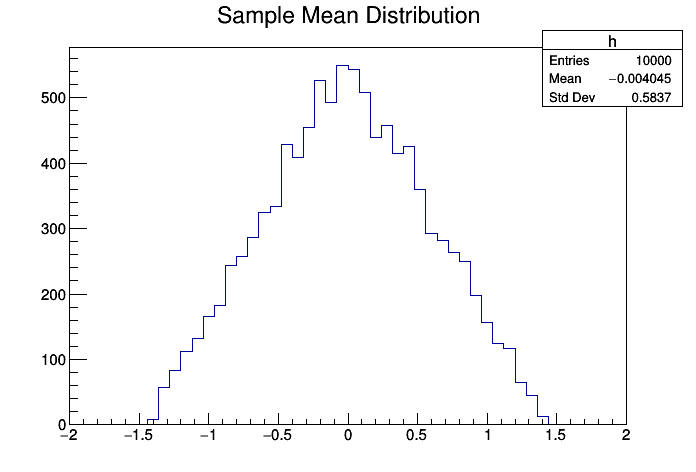

In [6]:
n = 2;
hout->Reset(); // for running this cell a second time
for (int iexp = 0; iexp < nexp; ++iexp){ 
    h1->Reset();
    for (int i = 0; i < n; ++i) {
        h1->Fill(r.Uniform(-1,1));
    }
    double average = sqrt(n)*h1->GetMean();
    hout->Fill(average);
}
hout->Draw();
gPad->Draw();

### Part 3: Fit the obtained histogram with a Gaussian function

we perform now a fit with a Gaussian distribution and see how the obtained data agree with the function

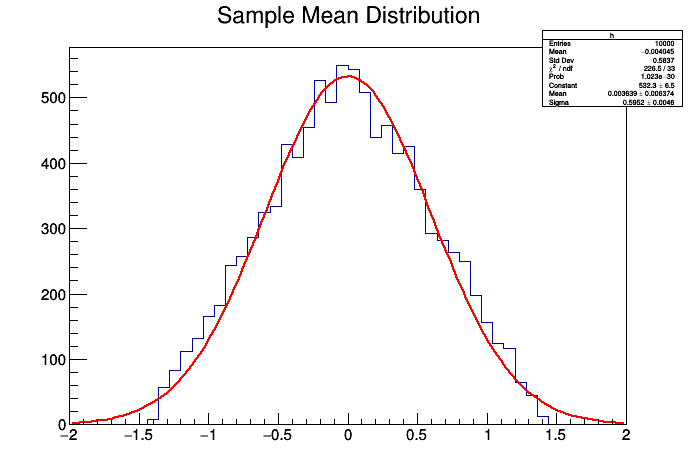

 FCN=226.458 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=9.76666e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.32296e+02   6.54072e+00   3.96502e-02   5.18912e-07
   2  Mean         3.63931e-03   6.37389e-03   4.68616e-05  -6.85231e-04
   3  Sigma        5.95212e-01   4.63812e-03   1.58913e-05   5.77603e-03


In [7]:
hout->Fit("gaus");
gPad->Draw();
gStyle->SetOptFit(1111);

Repeat the operation above by increasing $n$ to a larger value (e.g. $n=10$). For the Central Limit Theorem as $n$ is increased the obtained distribution will converge to a Gaussian. 

**Question** : What is the computed standard deviation of the distribution when we generate $n$ uniform number between [-1,1] ? 
What will be then the $\sigma$ if I generate the number between $[-\sqrt{3},\sqrt{3}]$ ?

**Answer** : $\sigma = 2/\sqrt{12}$ if we generate between [-1,1] and $\sigma = 1$ if $x \ \epsilon \ [-\sqrt{3},\sqrt{3}]$